In [1]:
#Importar bibliotecas
import pandas as pd
import numpy as np
import scipy 
from scipy import stats

In [19]:
#Importar dataframe
pdvals = pd.read_csv("C:\\Users\\Alisson Medeiros\\tese_cap4\\RF_brejos\\teste_hipotese.CSV", sep = ';')
pdvals

#Criar um dataframe para cada serra
MART1 = pdvals['MART']
SAN1 = pdvals['SAN']
PER1 = pdvals['PER']
JV1 = pdvals['JV']
ITA1 = pdvals['ITA']
PBR1 = pdvals['PBR']
MAT1 = pdvals['MAT']

In [23]:
#Teste de distribuição normal Shapiro-Wilk
stats.shapiro(MAT1)#Teste por dataframe

#Todas os conjuntos amostrais em p < que 0.05. Rejeita-se a hipótese nula (distribuição normal). 
#A distribuição NÃO É normal

ShapiroResult(statistic=0.8842231035232544, pvalue=2.7753665685081863e-11)

**AS VARIÁVEIS NÃO SEGUEM DISTRIBUIÇÃO NORMAL**

Por este motivo usaremos o Teste de Mann-Whitney U

In [24]:
pdvals

,MART,SAN,PER,JV,ITA,PBR,MAT
0,0.549245,0.476103,0.600422,0.503082,0.497714,0.601320,0.427320
1,0.510869,0.453981,0.498338,0.401556,0.506847,0.372445,0.322313
2,0.589498,0.442272,0.480387,0.401308,0.416524,0.450654,0.447914
3,0.589726,0.483559,0.521853,0.522669,0.602563,0.537572,0.467830
4,0.414616,0.439544,0.473732,0.518630,0.559067,0.430496,0.439776
...,...,...,...,...,...,...,...
195,0.514583,0.428834,0.484938,0.499417,0.548479,0.532399,0.565745
196,0.519986,0.446477,0.503080,0.505122,0.517854,0.547310,0.452382
197,0.582337,0.387565,0.536859,0.457695,0.436741,0.534860,0.433068
198,0.557121,0.523371,0.495267,0.472198,0.444513,0.469743,0.475002


In [39]:
#Criar dataframes para testes de hipótese
SAN_MART = pdvals[['MART', 'SAN']]
PER_MART = pdvals[['MART', 'PER']]
JV_MART = pdvals[['MART', 'JV']]
ITA_MART = pdvals[['MART', 'ITA']]
PBR_MART = pdvals[['MART', 'PBR']]
MAT_MART = pdvals[['MART', 'MAT']]

**Mann-Whitney U: Se o valor-p for menor ou igual ao nível de significância (0,05), a hipótese nula pode ser rejeitada.**

Hipótese nula: as medianas dos grupos são iguais e ambos são brejos de altitude (p > 0,05)

Hipótese alternativa: há diferenças significativas e apenas MART é brejo de altitude (p <= 0,05)


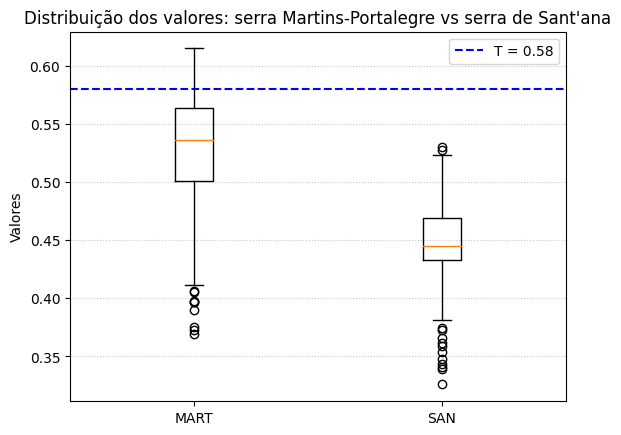

In [89]:
import matplotlib.pyplot as plt

# Boxplot
plt.boxplot([SAN_MART['MART'], SAN_MART['SAN']], labels=['MART', 'SAN'])

# Linha horizontal em y=0.58 (azul, tracejada, com espessura 1.5)
plt.axhline(y=0.58, color='blue', linestyle='--', linewidth=1.5, label='T = 0.58')

# Título e legendas
plt.title("Distribuição dos valores: serra Martins-Portalegre vs serra de Sant'ana")
plt.ylabel('Valores')
plt.legend()  # Mostra a legenda da linha

plt.grid(axis='y', linestyle=':', alpha=0.7)  # Grade opcional para referência
plt.savefig("Distribuição dos valores: serra Martins-Portalegre vs serra de Sant'ana.png")
plt.show()

In [45]:
#Teste de Mann-Whitney
from scipy.stats import mannwhitneyu

#Teste de Mann-Whitney U para SAN_MART
u_stat, p_value = mannwhitneyu(SAN_MART['MART'], SAN_MART['SAN'])
print(f"Mann-Whitney U: U = {u_stat}, p = {p_value}")

Mann-Whitney U: U = 34164.0, p = 1.6666085028694046e-34


SAN = SERRA DE SANT'ANA - RN

Valor de p : p = 1.6666085028694046e-34 < 0.05

*CONCLUSÃO: Para MART e SAN, os resultados indicam que **HÁ diferença significativa** entre os valores do modelo de brejos de altitude.*

**SERRA DE SANT'ANA não é um brejo de altitude**

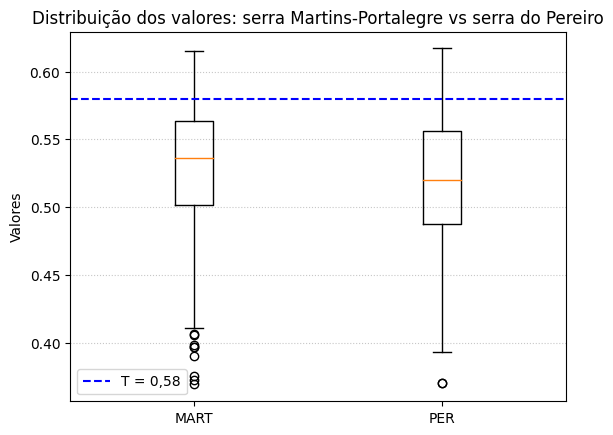

In [88]:
import matplotlib.pyplot as plt

# Boxplot
plt.boxplot([PER_MART['MART'], PER_MART['PER']], labels=['MART', 'PER'])

# Linha horizontal em y=0.58 (azul, tracejada, com espessura 1.5)
plt.axhline(y=0.58, color='blue', linestyle='--', linewidth=1.5, label='T = 0,58')

# Título e legendas
plt.title('Distribuição dos valores: serra Martins-Portalegre vs serra do Pereiro')
plt.ylabel('Valores')
plt.legend()  # Mostra a legenda da linha

plt.grid(axis='y', linestyle=':', alpha=0.7)  # Grade opcional para referência
plt.savefig('Distribuição dos valores: serra Martins-Portalegre vs serra do Pereiro.png')
plt.show()

In [52]:
#Teste de Mann-Whitney
from scipy.stats import mannwhitneyu

#Teste de Mann-Whitney U para PER_MART
u_stat, p_value = mannwhitneyu(PER_MART['MART'], PER_MART['PER'])
print(f"Mann-Whitney U: U = {u_stat}, p = {p_value}")

Mann-Whitney U: U = 22080.0, p = 0.07207360148048716


PER = SERRA DO PEREIRO - CE/RN/PB

Valor de p : p = 0.07207360148048716 > 0.05

*CONCLUSÃO: Para MART e PER, os resultados indicam que **NÃO há diferença significativa** entre os valores do modelo de brejos de altitude.*

**SERRA DO PEREIRO é um brejo de altitude**

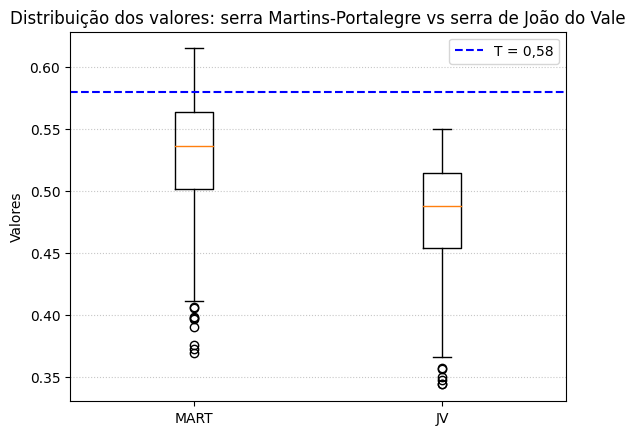

In [87]:
import matplotlib.pyplot as plt

# Boxplot
plt.boxplot([JV_MART['MART'], JV_MART['JV']], labels=['MART', 'JV'])

# Linha horizontal em y=0.58 (azul, tracejada, com espessura 1.5)
plt.axhline(y=0.58, color='blue', linestyle='--', linewidth=1.5, label='T = 0,58')

# Título e legendas
plt.title('Distribuição dos valores: serra Martins-Portalegre vs serra de João do Vale')
plt.ylabel('Valores')
plt.legend()  # Mostra a legenda da linha

plt.grid(axis='y', linestyle=':', alpha=0.7)  # Grade opcional para referência
plt.savefig('Distribuição dos valores: serra Martins-Portalegre vs serra de João do Vale.png')
plt.show()

In [46]:
#Teste DE Mann-Whitney
from scipy.stats import mannwhitneyu

#Teste DE Mann-Whitney U para JV_MART
u_stat, p_value = mannwhitneyu(JV_MART['MART'], JV_MART['JV'])
print(f"Mann-Whitney U: U = {u_stat}, p = {p_value}")

Mann-Whitney U: U = 30837.0, p = 7.051578284267475e-21


JV = SERRA DE JOÃO DO VALE - RN

Valor de p : p = 7.051578284267475e-21 < 0.05

*CONCLUSÃO: Para MART e JV, os resultados indicam que **HÁ diferença significativa** entre os valores do modelo de brejos de altitude.*

**SERRA DE JOÃO DO VALE não é um brejo de altitude**

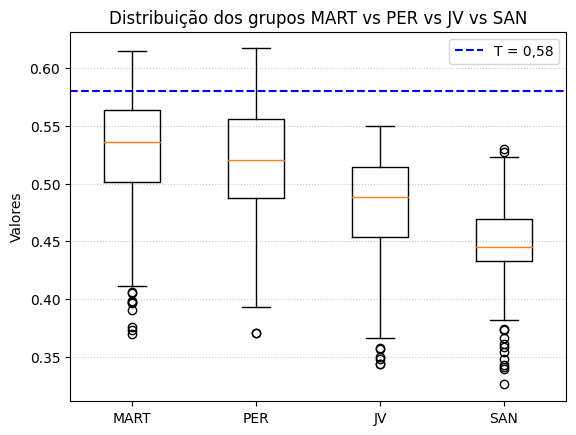

In [93]:
import matplotlib.pyplot as plt

# Boxplot
plt.boxplot([pdvals['MART'], pdvals['PER'], pdvals['JV'], pdvals['SAN']], labels=['MART', 'PER', 'JV', 'SAN'])

# Linha horizontal em y=0.58 (azul, tracejada, com espessura 1.5)
plt.axhline(y=0.58, color='blue', linestyle='--', linewidth=1.5, label='T = 0,58')

# Título e legendas
plt.title('Distribuição dos grupos MART vs PER vs JV vs SAN')
plt.ylabel('Valores')
plt.legend()  # Mostra a legenda da linha

plt.grid(axis='y', linestyle=':', alpha=0.7)  # Grade opcional para referência
plt.savefig('Distribuição dos grupos MART vs PER vs JV vs SAN.png')
plt.show()

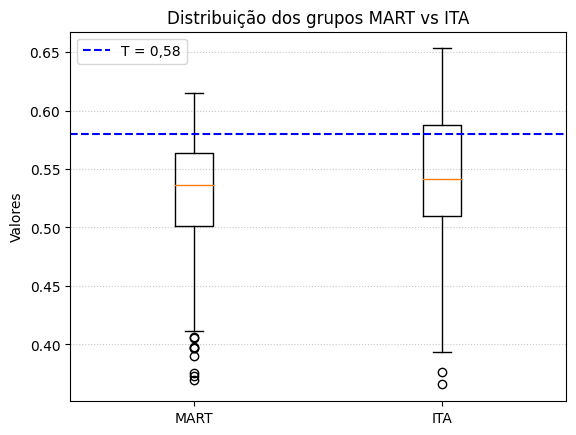

In [86]:
import matplotlib.pyplot as plt

# Boxplot
plt.boxplot([ITA_MART['MART'], ITA_MART['ITA']], labels=['MART', 'ITA'])

# Linha horizontal em y=0.58 (azul, tracejada, com espessura 1.5)
plt.axhline(y=0.58, color='blue', linestyle='--', linewidth=1.5, label='T = 0,58')

# Título e legendas
plt.title('Distribuição dos grupos MART vs ITA')
plt.ylabel('Valores')
plt.legend()  # Mostra a legenda da linha

plt.grid(axis='y', linestyle=':', alpha=0.7)  # Grade opcional para referência
plt.show()

In [47]:
#Teste de Mann-Whitney
from scipy.stats import mannwhitneyu

#Teste de Mann-Whitney U para ITA_MART
u_stat, p_value = mannwhitneyu(ITA_MART['MART'], ITA_MART['ITA'])
print(f"Mann-Whitney U: U = {u_stat}, p = {p_value}")

Mann-Whitney U: U = 17464.0, p = 0.028302495448627434


ITA = SERRA DE ITATIRA - CE

Valor de p : p = 0.028302495448627434 < 0.05

*CONCLUSÃO: Para MART e ITA, os resultados indicam que **HÁ diferença significativa** entre os valores do modelo de brejos de altitude.*

**SERRA SERRA DE ITATIRA não é um brejo de altitude**

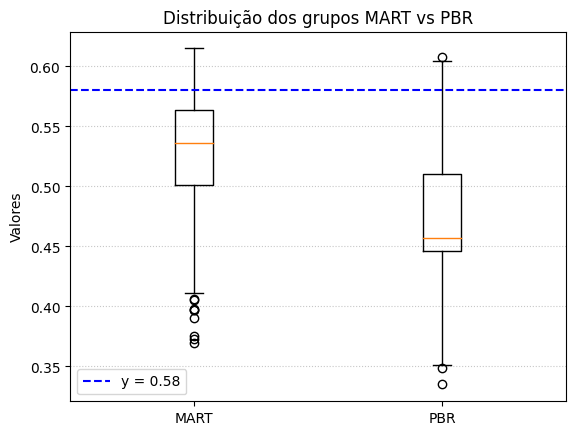

In [70]:
import matplotlib.pyplot as plt

# Boxplot
plt.boxplot([PBR_MART['MART'], PBR_MART['PBR']], labels=['MART', 'PBR'])

# Linha horizontal em y=0.58 (azul, tracejada, com espessura 1.5)
plt.axhline(y=0.58, color='blue', linestyle='--', linewidth=1.5, label='y = 0.58')

# Título e legendas
plt.title('Distribuição dos grupos MART vs PBR')
plt.ylabel('Valores')
plt.legend()  # Mostra a legenda da linha

plt.grid(axis='y', linestyle=':', alpha=0.7)  # Grade opcional para referência
plt.show()

In [69]:
#Teste de Mann-Whitney
from scipy.stats import mannwhitneyu

#Teste de Mann-Whitney U para PBR_MART
u_stat, p_value = mannwhitneyu(PBR_MART['MART'], PBR_MART['PBR'])
print(f"Mann-Whitney U: U = {u_stat}, p = {p_value}")

Mann-Whitney U: U = 29248.0, p = 1.258643420221706e-15


PBR = SERRA DE PEDRA BRANCA - CE

Valor de p : p = 1.258643420221706e-15 < 0.05

*CONCLUSÃO: Para MART e PBR, os resultados indicam que **HÁ diferença significativa** entre os valores do modelo de brejos de altitude.*

**SERRA DE PEDRA BRANCA não é um brejo de altitude**

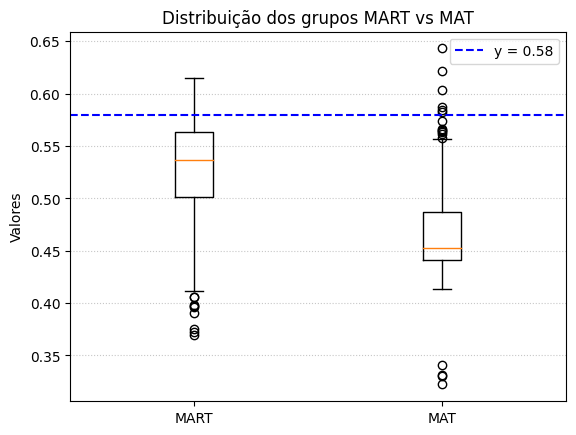

In [71]:
import matplotlib.pyplot as plt

# Boxplot
plt.boxplot([MAT_MART['MART'], MAT_MART['MAT']], labels=['MART', 'MAT'])

# Linha horizontal em y=0.58 (azul, tracejada, com espessura 1.5)
plt.axhline(y=0.58, color='blue', linestyle='--', linewidth=1.5, label='y = 0.58')

# Título e legendas
plt.title('Distribuição dos grupos MART vs MAT')
plt.ylabel('Valores')
plt.legend()  # Mostra a legenda da linha

plt.grid(axis='y', linestyle=':', alpha=0.7)  # Grade opcional para referência
plt.show()

In [49]:
#Teste de Mann-Whitney
from scipy.stats import mannwhitneyu

#Teste de Mann-Whitney U para PBR_MART
u_stat, p_value = mannwhitneyu(MAT_MART['MART'], MAT_MART['MAT'])
print(f"Mann-Whitney U: U = {u_stat}, p = {p_value}")

Mann-Whitney U: U = 30883.0, p = 4.8326367954013274e-21


MAT = SERRA DAS MATAS - CE

Valor de p : p = 1.258643420221706e-15 < 0.05

*CONCLUSÃO: Para MART e MAT, os resultados indicam que **HÁ diferença significativa** entre os valores do modelo de brejos de altitude.*

**SERRA DAS MATAS não é um brejo de altitude**

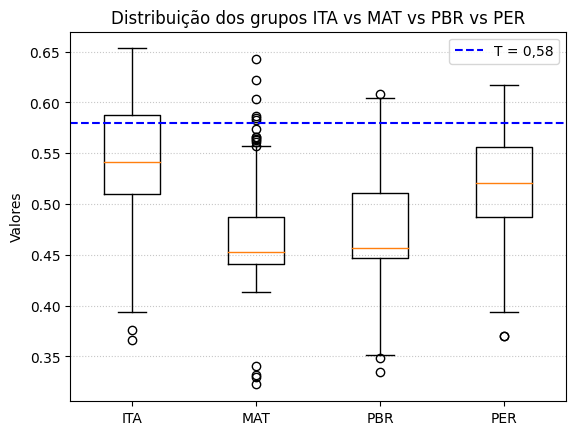

In [94]:
import matplotlib.pyplot as plt

# Boxplot
plt.boxplot([pdvals['ITA'], pdvals['MAT'], pdvals['PBR'], pdvals['PER']], labels=['ITA', 'MAT', 'PBR','PER'])

# Linha horizontal em y=0.58 (azul, tracejada, com espessura 1.5)
plt.axhline(y=0.58, color='blue', linestyle='--', linewidth=1.5, label='T = 0,58')

# Título e legendas
plt.title('Distribuição dos grupos ITA vs MAT vs PBR vs PER')
plt.ylabel('Valores')
plt.legend()  # Mostra a legenda da linha

plt.grid(axis='y', linestyle=':', alpha=0.7)  # Grade opcional para referência
plt.savefig('Distribuição dos grupos ITA vs MAT vs PBR vs PER.png')
plt.show()

DESCARTADOS

In [ ]:
from scipy.stats import mannwhitneyu
import numpy as np

# Dados (substitua pelos seus vetores reais)
group1 = JV_MART['MART'].values  # Grupo MART
group2 = JV_MART['JV'].values   # Grupo PER

# Verifica tamanhos dos grupos
n1 = len(group1)
n2 = len(group2)
print(f"Tamanho dos grupos: n_MART = {n1}, n_PER = {n2}")

# Teste de Mann-Whitney U
u_stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')  # Bilateral por padrão
print(f"\nResultado do Mann-Whitney U:")
print(f"U = {u_stat}, p = {p_value:.5e}")  # Notação científica para p-value

# Tamanho do efeito (Rank-biserial correlation)
r = 1 - (2 * u_stat) / (n1 * n2)
print(f"\nTamanho do efeito (Rank-biserial correlation): r = {r:.3f}")

# Interpretação do tamanho do efeito
if abs(r) < 0.1:
    interpretation = "Efeito trivial"
elif abs(r) < 0.3:
    interpretation = "Efeito pequeno"
elif abs(r) < 0.5:
    interpretation = "Efeito moderado"
else:
    interpretation = "Efeito grande"

print(f"Interpretação: {interpretation}")

# Boxplot para visualização
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.boxplot([group1, group2], labels=['MART', 'PER'], patch_artist=True)
plt.title('Distribuição de MART vs PER')
plt.ylabel('Valores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()